# Lecture 4

In [ ]:
from typing import Tuple, Any

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor# you may need to install XGBoost
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from yellowbrick.model_selection import learning_curve

# helpers
from src.helpers import feature_importance_plot

sns.set(rc={"figure.figsize": (20,10)})

In [3]:
users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")

Defining target and features

In [4]:
target = users_data["total_amount_usd"]
features = users_data.drop(columns="total_amount_usd")

C:\Users\terje\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount_usd'>

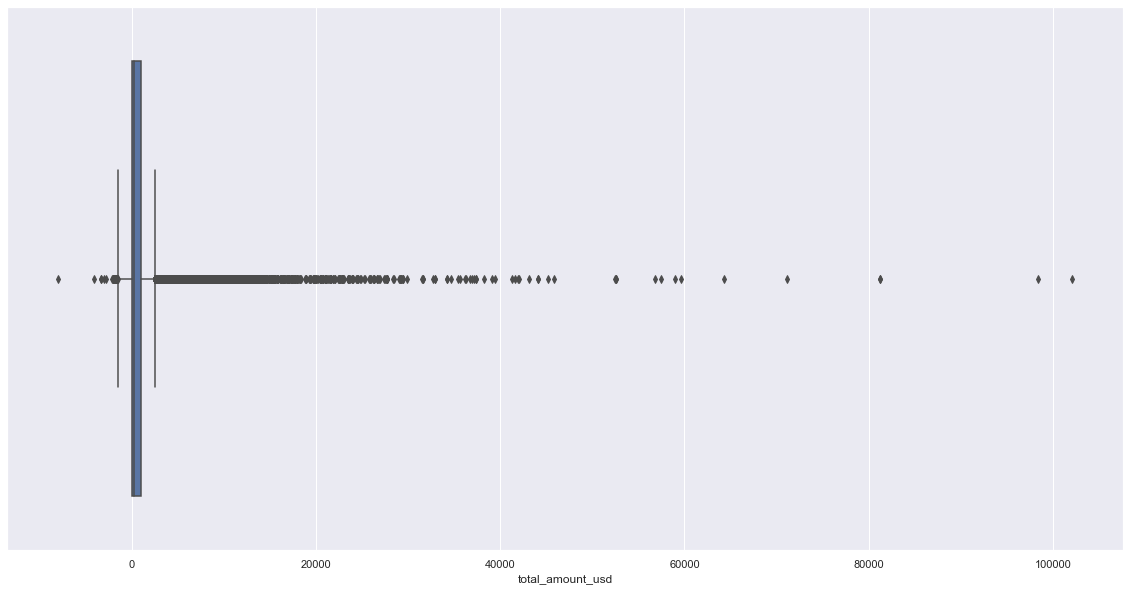

In [5]:
sns.boxplot(target)

Splitting dataset

In [28]:
def split_and_print_shape(features: pd.DataFrame, target: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.2)

    print(f"X_train shape {X_train.shape}")
    print(f"X_test shape {X_test.shape}")
    print(f"y_train shape {y_train.shape}")
    print(f"y_test shape {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = split_and_print_shape(features, target)

X_train shape (36143, 36)
X_test shape (9036, 36)
y_train shape (36143,)
y_test shape (9036,)


## Modelling

In [ ]:
# Build the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions and call this variable y_pred_dt
y_pred_dt = dt.predict(X_test)

In [27]:
def train_model_print_5(model, X_train=X_train, X_test=X_test,
                        y_train=y_train, y_test=y_test):
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("first five predicted values:", y_pred[0:5])
    print("first five actual values:", list(y_test[0:5]))

    return model, y_pred

In [29]:
model, y_pred = train_model_print_5(DecisionTreeRegressor)

first five predicted values: [5021. 3969. 6298.  118.  952.]
first five actual values: [3025.0, 197.0, 5057.0, 378.0, 1230.0]


### Visualise tree

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25 , 20))
_ = tree.plot_tree(dt,
                   feature_names = list(X_train.columns),
                   max_depth = 3,
                   filled = True)


### Evaluate model

In [58]:
def evaluate_model(model, y_test=y_test, y_pred=y_pred):
    scores = ["r2", "neg_root_mean_squared_error", "neg_absolute_mean_squared_error"]


    r2 = r2_score(y_test, y_pred)
    print("R2:", round(r2, 2))
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", round(mae))
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", round(mse))

    for score in scores:
        learning_curve(model, X_train, y_train, cv=3, scoring=score,n_jobs=-1)


In [31]:
evaluate_model()

R2: -0.93
Mean Absolute Error: 1542
Mean Squared Error: 13671378


### Feature importance

In [ ]:
feature_importance_plot(model, X_train, n=10)

## Random forest

In [43]:
rff_model, rff_y_pred = train_model_print_5(RandomForestRegressor)

first five predicted values: [3115.36 2194.13 1546.52  482.23 3453.59]
first five actual values: [3025.0, 197.0, 5057.0, 378.0, 1230.0]


R2: 0.01
Mean Absolute Error: 1192
Mean Squared Error: 7009691
dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state

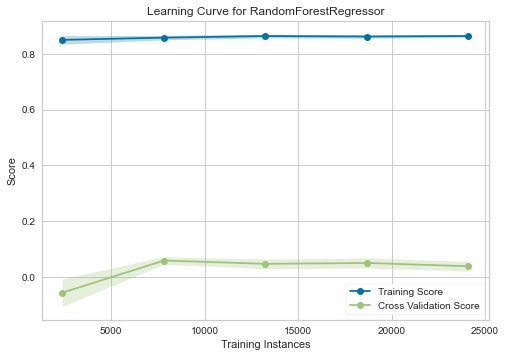

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha

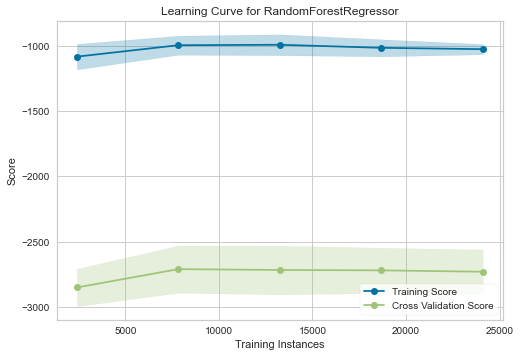

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'oob_score', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'bootstrap', 'ccp_alpha

ValueError: 'neg_absolute_mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

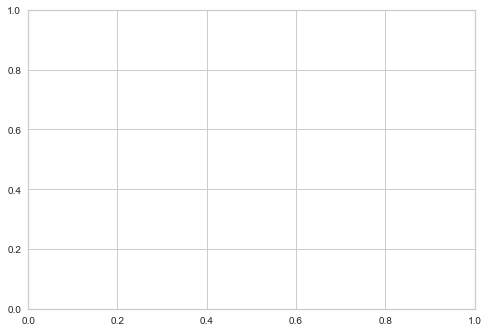

In [59]:
evaluate_model(rff_model, y_pred=rff_y_pred)

In [ ]:
feature_importance_plot(rff_model, X_train, n=10)

## XGBoost

In [ ]:
xg_model, xg_pred = train_model_print_5(XGBRegressor)

R2: 0.03
Mean Absolute Error: 1171
Mean Squared Error: 6892208
dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'num_parallel_tree', 'predictor', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interacti

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

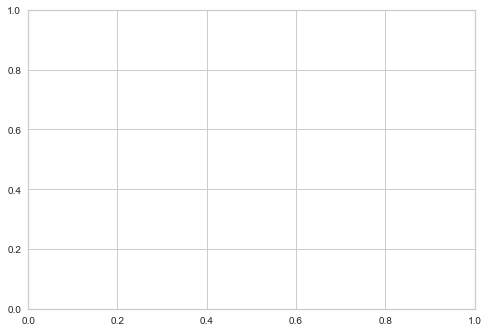

In [57]:
## Evaluate test
evaluate_model(xg_model, y_pred=xg_pred)

In [ ]:
feature_importance_plot(xg_model, X_train, n=10)

In [ ]:
learning_curve(XGBRegressor(), features, target, cv=10, scoring='r2')

In [18]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei